In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit

import numpy as np

In [2]:
df = pd.read_csv(r"D:\progs\fuzzy-chainsaw\2024_2025\Spectroscopy\stars_06\data.csv", comment='#')

df

,id,HJD,BCV,RV1,RV2
0,1140,6769.673483,6.484246,-10.9452,-150.2172
1,1131,6790.564910,-3.409508,-5.2286,-136.3682
2,1130,6840.580503,-23.253550,-32.5802,-75.1153
3,1124,6869.527843,-27.983050,-75.1153,-23.7950
4,1119,6898.491687,-26.264930,10.5100,-104.1421
5,1120,6904.490569,-25.087140,-68.5817,-35.8785


In [3]:
T0 = 1906.0056 
P = 8.5365711

df['phase'] =  ((df['HJD'] - T0) / P) - np.floor((df['HJD'] - T0) / P)

In [4]:
df['RV1_corr'] = df['RV1'] - df['BCV']
df['RV2_corr'] = df['RV2'] - df['BCV']

In [5]:
df

,id,HJD,BCV,RV1,RV2,phase,RV1_corr,RV2_corr
0,1140,6769.673483,6.484246,-10.9452,-150.2172,0.744904,-17.429446,-156.701446
1,1131,6790.564910,-3.409508,-5.2286,-136.3682,0.192190,-1.819092,-132.958692
2,1130,6840.580503,-23.253550,-32.5802,-75.1153,0.051169,-9.326650,-51.861750
3,1124,6869.527843,-27.983050,-75.1153,-23.7950,0.442149,-47.132250,4.188050
4,1119,6898.491687,-26.264930,10.5100,-104.1421,0.835062,36.774930,-77.877170
5,1120,6904.490569,-25.087140,-68.5817,-35.8785,0.537789,-43.494560,-10.791360


Text(0, 0.5, 'Radial velocity - BCV, km/s')

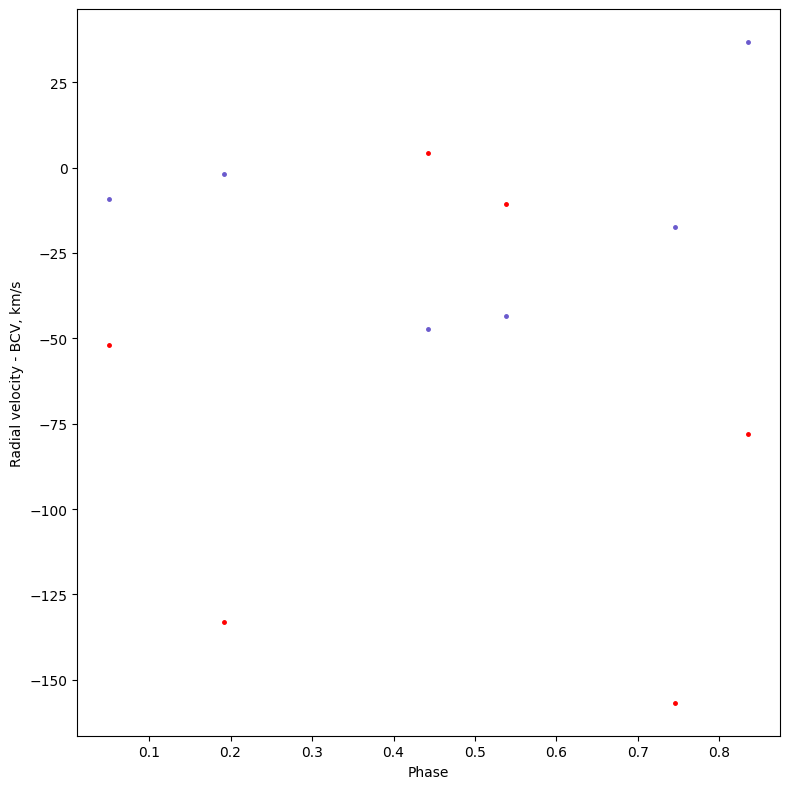

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8,8), tight_layout = True)

ax.scatter(df['phase'], df['RV1_corr'], color='slateblue', marker='.', s=25, label='Component 1')
ax.scatter(df['phase'], df['RV2_corr'], color='red', marker='.', s=25, label='Component 2')

ax.set_xlabel('Phase')
ax.set_ylabel('Radial velocity - BCV, km/s')